# Example 1

Calculation of response spectrum.

In [2]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np 
import pyrotd

%matplotlib inline

plt.rcParams['figure.dpi'] = 120

Create a function for loading AT2 formatted time series.

In [3]:
def load_at2(fpath):
    with open(fpath) as fp:
        for _ in range(3):
            next(fp)
        line = next(fp)
        time_step = float(line[17:25])
        accels = np.array([p for l in fp for p in l.split()]).astype(float)
    return time_step, accels

Load the a pair of rotated time series in the PEER AT2 format.

In [4]:
time_step, accels = load_at2(os.path.join('data', 'RSN8883_14383980_13849360.AT2'))

Compute the response spectrum.

In [5]:
osc_damping = 0.05
osc_freqs = np.logspace(-1, 2, 91)

osc_resps = pyrotd.calc_spec_accels(
        time_step, accels, osc_freqs, osc_damping
)
osc_resps

rec.array([(  0.1       , 0.00092943), (  0.10797752, 0.00108525),
           (  0.11659144, 0.00127161), (  0.12589254, 0.00147033),
           (  0.13593564, 0.00170921), (  0.14677993, 0.00198175),
           (  0.15848932, 0.00235189), (  0.17113283, 0.00278025),
           (  0.18478498, 0.00329777), (  0.19952623, 0.00394955),
           (  0.21544347, 0.00476789), (  0.23263051, 0.00573368),
           (  0.25118864, 0.0069939 ), (  0.27122726, 0.00844942),
           (  0.29286446, 0.01026379), (  0.31622777, 0.01238632),
           (  0.34145489, 0.0148066 ), (  0.36869451, 0.01753039),
           (  0.39810717, 0.02051041), (  0.42986623, 0.02559774),
           (  0.46415888, 0.031415  ), (  0.50118723, 0.03731247),
           (  0.54116953, 0.04454992), (  0.58434141, 0.0552869 ),
           (  0.63095734, 0.06380861), (  0.68129207, 0.07407153),
           (  0.73564225, 0.08885853), (  0.79432823, 0.10246932),
           (  0.8576959 , 0.11147286), (  0.92611873, 0.123896

Plot the response spectrum in log-log and log-linear space.

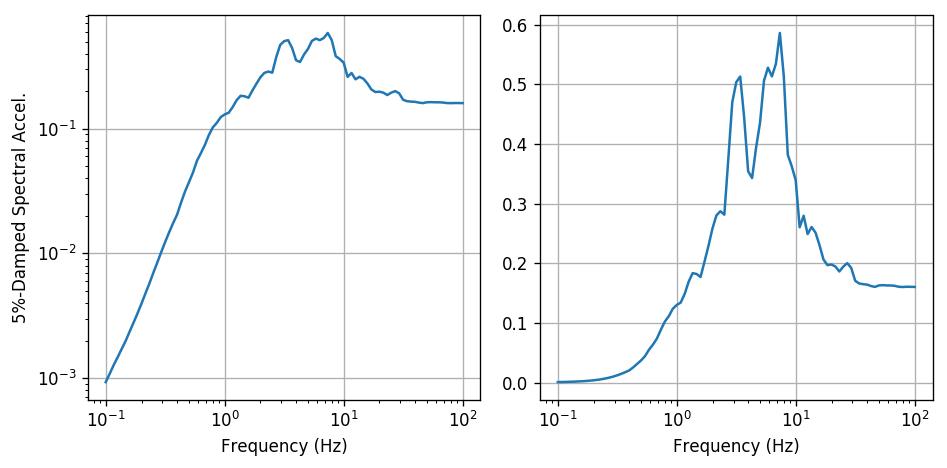

In [6]:
fig, axes = plt.subplots(
    ncols=2, figsize=(8, 4), subplot_kw={'xscale': 'log'}, 
    sharey=False, sharex=True
)

for ax, yscale in zip(axes, ['log', 'linear']):
    ax.plot(osc_resps.osc_freq, osc_resps.spec_accel)
    ax.set_yscale(yscale)
    ax.grid()

axes[0].set_ylabel('5%-Damped Spectral Accel.')
plt.setp(axes, xlabel='Frequency (Hz)')

fig.tight_layout();